In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy import signal

In [2]:
# Length is always given in seconds!!!
samplerate = 44100

# Sine wave generator
def sine_wave(freq, length):
    t = np.linspace(0, length, int(length*samplerate), endpoint=False)
    return 0.5*np.sin(2*np.pi*freq*t)

# Rectangular wave generator
def rectangular_wave(freq, length, amplitude):
    if amplitude > 1:
        amplitude = 1
    elif amplitude <= 0.1:
        amplitude = 0.1
    sin = sine_wave(freq, length)
    rect_wave = []
    for i in range(len(sin)):
        if sin[i] > 0:
            y = amplitude
        else:
            y = 0
        rect_wave.append(y)
    return rect_wave

# Sawtooth wave generator
def sawtooth_wave(freq, length):
    length = int(44100*length)
    t = np.linspace(0, 1, length)
    return signal.sawtooth(2 * np.pi * freq * t)

# Triangular wave generator
def triangular_wave(freq, length):
    length = int(44100*length)
    t = np.linspace(0, 1, length)
    return signal.sawtooth(2 * np.pi * freq * t, 0.5)

# White noise generator
def white_noise(length, amplitude):
    length = int(length*44100)
    return np.random.uniform(-amplitude, amplitude, length)

# Overall result generator function
def wave_fun(freq, length, amplitude):
    sine = sine_wave(freq, length)
    rectangule = rectangular_wave(freq, length, amplitude)
    saw = sawtooth_wave(freq, length)
    triangular = triangular_wave(freq, length)
    noise = white_noise(length, amplitude)
    return sine+rectangule+saw+triangular+noise

# Lowpass filter
def lowpass(fs, f, Q, result):
    s = np.sin(2*np.pi*f/fs)
    c = np.cos(2*np.pi*f/fs)
    a = s / 2*Q
    r = 1 / (1+a)
    result = result
#   Parameters of the filter
    a0 = 0.5*(1-c)*r
    a1 = (1-c)*r
    a2 = a0
    b1 = -2*c*r
    b2 = (1-a)*r
    filtered_result = []
    for i in range(len(result)):
        if i > 2:
            filtered_result.append(a0*result[i] + a1*result[i-1] + 
                                   a2*result[i-2] - b1*filtered_result[i-1] - b2*filtered_result[i-2])
        else:
            filtered_result.append(a0*result[i])
    print(filtered_result)
    return filtered_result

# Complex sound creating
def comp_wave(freq, length, amplitude):
    final_sound = []
    f = freq
    l = length
    amp = amplitude
    print(range(len(length)))
    for i in enumerate(length):
        fin = wave_fun(f[i], l[i], amp[i])
        for j in range(len(fin)):
            final_sound.append(fin[j])
    return final_sound

In [3]:
# Complex sound generating
freq = [391.9, 329.6, 329.6, 349.6, 293.7, 293.7, 261.6, 329.6, 391.9]
length = [0.4, 0.4, 0.4, 0.4, 0.4, 0.4, 0.2, 0.2, 0.4]
amplitude = [1, 1, 0.5, 0.5, 1, 1, 1, 1, 0.5]
final_sound = []
for i in range(len(length)):
    fin = wave_fun(freq[i], length[i], amplitude[i])
    for j in range(len(fin)):
        final_sound.append(fin[j])


In [4]:
# Lowpass filter implementation
result = final_sound
f = 2
fs = 200
Q = 0.5
s = np.sin(2*np.pi*f/fs)
c = np.cos(2*np.pi*f/fs)
a = s / 2*Q
r = 1 / (1+a)

a0 = 0.5*(1-c)*r
a1 = (1-c)*r
a2 = a0
b1 = -2*c*r
b2 = (1-a)*r
filtered_result = []
for i in range(len(result)):
    if i > 2:
        filtered_result.append(a0*result[i] + a1*result[i-1] + 
                               a2*result[i-2] - b1*filtered_result[i-1] - b2*filtered_result[i-2])
    else:
        filtered_result.append(a0*result[i])

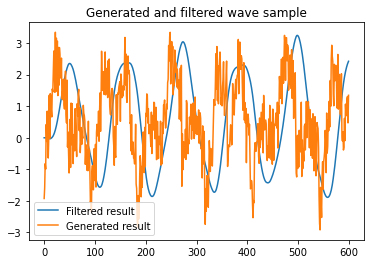

In [5]:
plt.title("Generated and filtered wave sample")
plt.plot(filtered_result[:600], label="Filtered result")
plt.plot(result[:600], label="Generated result")
plt.legend()
plt.show()

In [6]:
ipd.Audio(final_sound, rate=samplerate)

In [7]:
ipd.Audio(filtered_result, rate=samplerate)

In [8]:
# ##########################
# OCEAN WAVE GENERATING PART
# ##########################

In [11]:
# Sine wave generator
def LFO_wave(freq, length):
    t = np.linspace(0, length, int(length*samplerate), endpoint=False)
    f = np.linspace(400, 1400, int(length*samplerate))
    sin = []
    for i in range(length*samplerate):
        sin.append(0.5*np.sin(1*np.pi*f[i]*t))
    return sin

In [ ]:
LFO = LFO_wave(0.5, 4)
noise = white_noise(4, 2)
ocean_wave = noise

In [ ]:
plt.title("Ocean wave sample")
plt.plot(LFO)
plt.show()

In [ ]:
ipd.Audio(ocean_wave, rate=samplerate)

In [ ]:
result = ocean_wave
ocean_wave_filtered = []
for i in range(len(ocean_wave)):
    f = LFO[i]
    fs = 44100
    Q = 5
    s = np.sin(2*np.pi*f/fs)
    c = np.cos(2*np.pi*f/fs)
    a = s / 2*Q
    r = 1 / (1+a)

    a0 = 0.5*(1-c)*r
    a1 = (1-c)*r
    a2 = a0
    b1 = -2*c*r
    b2 = (1-a)*r
    if i > 2:
        ocean_wave_filtered.append(a0*result[i] + a1*result[i-1] + a2*result[i-2] 
                                   - b1*ocean_wave_filtered[i-1] - b2*ocean_wave_filtered[i-2])
    else:
        ocean_wave_filtered.append(a0*result[i])

In [ ]:
ocean_wave_final = ocean_wave_filtered * 3
ipd.Audio(ocean_wave_final, rate=samplerate)

In [ ]:
plt.title("Ocean wave sample")
plt.plot(ocean_wave[:400])
plt.show()
plt.title("Filtered ocean wave sample")
plt.plot(ocean_wave_filtered[:400], color="orange")

In [ ]:
plt.title("Filtered and not filtered ocean wave sample")
plt.plot(ocean_wave, label="Generated result")
plt.plot(ocean_wave_filtered, label="Filtered result")
plt.legend()
plt.show()